Calculate Kuiper metric for a given cadence for each point of the sky.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

from simcodes.fitters import ExtendedLS
from gatspy.periodic import LombScargleMultiband
from KuiperMetric import KuiperVS
from datetime import datetime

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
conn = maf.db.OpsimDatabase(baseline_file)

outDir = datetime.today().strftime('%d_%m_%Y_')+'magLims'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [3]:
# Same for rolling cadence
rollDbFile = '/home/alex/rubin_sim_data/rolling_all_sky_ns2_rw0.9_v2.0_10yrs.db'
rollName = os.path.split(rollDbFile)[-1].replace('.db', '')
rollDb = maf.db.OpsimDatabase(rollDbFile)
resultsDbRoll = maf.db.ResultsDb(outDir=outDir)
print(rollName)

rolling_all_sky_ns2_rw0.9_v2.0_10yrs


In [56]:
# Set range of periods for which we're gonna build the maps
start=0.1
numPoints=500
totalObsLength=365*5

periods=np.round(np.geomspace(start,totalObsLength,numPoints),4)
magLims=[23,23.5,24,24.5]

results={}
resultsRoll={}

for mag in magLims:
    results[mag]=[]
    resultsRoll[mag]=[]
    
summary_metrics = [maf.MedianMetric()]
sql = ''
nside=2**5 # for HealpixSlicer
slicer = maf.HealpixSlicer(nside=nside)
for p in periods:
    for mag in magLims:
        metric = KuiperVS(period=p,starMags=[mag]*6)
        
        results[mag].append(maf.MetricBundle(metric, slicer, sql, summaryMetrics=summary_metrics, 
                                           runName='KuiperMedian_'+str(p)))
        
        resultsRoll[mag].append(maf.MetricBundle(metric, slicer, sql, summaryMetrics=summary_metrics, 
                                               runName='RollKuiperMedian_'+str(p)))

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [57]:
for mag in magLims:
    bd = maf.metricBundles.makeBundlesDictFromList(results[mag])
    bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()

Querying database observations with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'rotSkyPos', 'filter'].
Found 2086980 visits
Running:  ['KuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1194_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1217_KuiperVS_obs

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'rotSkyPos', 'filter'].
Found 2086980 visits
Running:  ['KuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1194

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'rotSkyPos', 'filter'].
Found 2086980 visits
Running:  ['KuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1194

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'rotSkyPos', 'filter'].
Found 2086980 visits
Running:  ['KuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'KuiperMedian_0_1194

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [58]:
for mag in magLims:
    bd = maf.metricBundles.makeBundlesDictFromList(resultsRoll[mag])
    bg = maf.metricBundles.MetricBundleGroup(bd, rollDb, outDir=outDir, resultsDb=resultsDbRoll)
    bg.runAll()

Querying database observations with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'rotSkyPos', 'filter'].
Found 2088105 visits
Running:  ['RollKuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1194_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'rotSkyPos', 'filter'].
Found 2088105 visits
Running:  ['RollKuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSi

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'rotSkyPos', 'filter'].
Found 2088105 visits
Running:  ['RollKuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSi

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with no constraint for columns ['fieldDec', 'fieldRA', 'fiveSigmaDepth', 'observationStartMJD', 'rotSkyPos', 'filter'].
Found 2088105 visits
Running:  ['RollKuiperMedian_0_1_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_102_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_104_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1061_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1082_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1103_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1125_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_1148_KuiperVS_observationStartMJD_filter_fiveSigmaDepth_HEAL', 'RollKuiperMedian_0_117_KuiperVS_observationStartMJD_filter_fiveSi

Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [59]:
getMedianDict=lambda bList:[(float(p.runName.split('_')[1]),round(p.summaryValues['Median'],3)) for p in bList]
periods={}
periodsRoll={}
for mag in magLims:
    periods[mag]=pd.DataFrame(columns=['period','median Kuiper value'],data=getMedianDict(results[mag]))
    periodsRoll[mag]=pd.DataFrame(columns=['period','median Kuiper value'],data=getMedianDict(resultsRoll[mag]))

Text(0, 0.5, 'Median Kuiper metric')

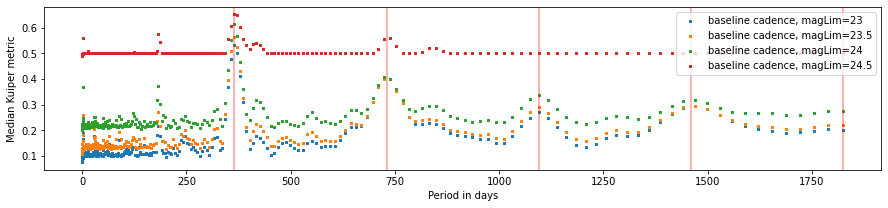

In [60]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
for mag in magLims:
    ax.scatter(periods[mag]['period'],periods[mag]['median Kuiper value'],
               s=8,label='baseline cadence, magLim='+str(mag),marker='s')
    #ax.scatter(periodsRoll[mag]['period'],periodsRoll[mag]['median Kuiper value'],marker='+',
    #           s=15-2*i,alpha=0.8,label='rolling cadence, magLim='+str(mag))
i=0
while i<totalObsLength:
    i+=365
    ax.axvline(i,color='r',alpha=0.4)
ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Median Kuiper metric')

Text(0, 0.5, 'Median Kuiper metric')

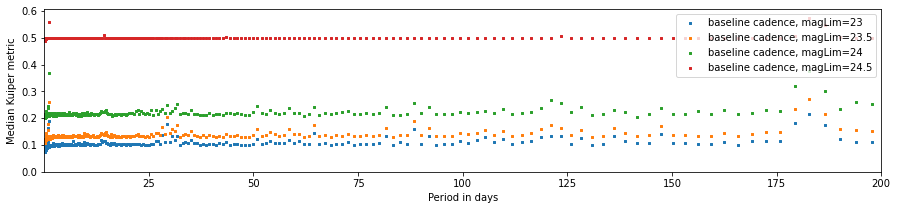

In [61]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
for mag in magLims:
    ax.scatter(periods[mag]['period'],periods[mag]['median Kuiper value'],
               s=8,label='baseline cadence, magLim='+str(mag),marker='s')
    #ax.scatter(periodsRoll[mag]['period'],periodsRoll[mag]['median Kuiper value'],marker='+',
    #           s=15-2*i,alpha=0.8,label='rolling cadence, magLim='+str(mag))
    ax.set_xlim(0.001,200)
    ax.set_ylim(0,max(list(periods[mag]['median Kuiper value'])[:200])+0.05)
i=0
while i<200:
    i+=365
    ax.axvline(i,color='r',alpha=0.4)
ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Median Kuiper metric')

Text(0, 0.5, 'Median Kuiper metric')

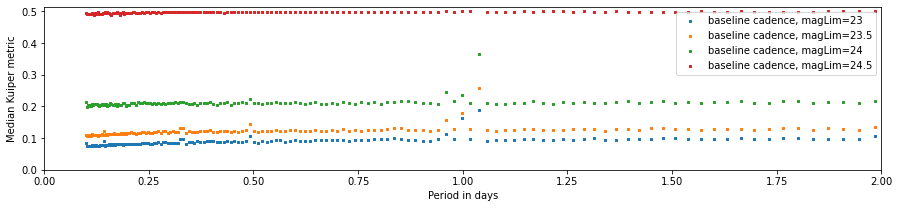

In [62]:
fig,ax=plt.subplots(1,1,figsize=(15,3))
for mag in magLims:
    ax.scatter(periods[mag]['period'],periods[mag]['median Kuiper value'],
               s=8,label='baseline cadence, magLim='+str(mag),marker='s')
    #ax.scatter(periodsRoll[mag]['period'],periodsRoll[mag]['median Kuiper value'],marker='+',
    #           s=15-2*i,alpha=0.8,label='rolling cadence, magLim='+str(mag))
    ax.set_xlim(0,2)
    ax.set_ylim(0,max(list(periods[mag]['median Kuiper value'])[:2])+0.02)

ax.legend()
ax.set_xlabel('Period in days')
ax.set_ylabel('Median Kuiper metric')

In [63]:
cadenceComparison={}
for mag in magLims:
    cadenceComparison[mag]=pd.DataFrame(columns=['period min','period max',
                                            'baseline median Kuiper','rolling median Kuiper','base-roll'])

    baseKuiper=periods[mag][(periods[mag]['period']>0.1) & 
                                        (periods[mag]['period']<=1)]['median Kuiper value'].median().round(5)
    rollKuiper=periodsRoll[mag][(periodsRoll[mag]['period']>0.1) & 
                                        (periodsRoll[mag]['period']<=1)]['median Kuiper value'].median().round(5)
    d={'period min':0.1,'period max':1,
          'baseline median Kuiper':baseKuiper,
          'rolling median Kuiper':rollKuiper,
          'base-roll':baseKuiper-rollKuiper}
    cadenceComparison[mag]=cadenceComparison[mag].append(d,ignore_index=True)

    for i in range(1,totalObsLength,365):
        baseKuiper=periods[mag][(periods[mag]['period']>i) & 
                                        (periods[mag]['period']<=i+365)]['median Kuiper value'].median().round(5)
        rollKuiper=periodsRoll[mag][(periodsRoll[mag]['period']>i) & 
                                        (periodsRoll[mag]['period']<=i+365)]['median Kuiper value'].median().round(5)
        
        d={'period min':i,'period max':i+365,
          'baseline median Kuiper':baseKuiper,
          'rolling median Kuiper':rollKuiper,
          'base-roll':baseKuiper-rollKuiper}
        cadenceComparison[mag]=cadenceComparison[mag].append(d,ignore_index=True)

In [64]:
cadenceComparison[23]

,period min,period max,baseline median Kuiper,rolling median Kuiper,base-roll
0,0.1,1.0,0.0870,0.0860,0.0010
1,1.0,366.0,0.1030,0.1040,-0.0010
2,366.0,731.0,0.1520,0.1540,-0.0020
3,731.0,1096.0,0.2160,0.2160,0.0000
4,1096.0,1461.0,0.1815,0.1850,-0.0035
5,1461.0,1826.0,0.2045,0.2075,-0.0030


In [65]:
cadenceComparison[23.5]

,period min,period max,baseline median Kuiper,rolling median Kuiper,base-roll
0,0.1,1.0,0.1200,0.1200,0.000
1,1.0,366.0,0.1340,0.1350,-0.001
2,366.0,731.0,0.1830,0.1830,0.000
3,731.0,1096.0,0.2340,0.2320,0.002
4,1096.0,1461.0,0.1975,0.2045,-0.007
5,1461.0,1826.0,0.2190,0.2220,-0.003


In [66]:
cadenceComparison[24]

,period min,period max,baseline median Kuiper,rolling median Kuiper,base-roll
0,0.1,1.0,0.2100,0.2100,0.000
1,1.0,366.0,0.2160,0.2170,-0.001
2,366.0,731.0,0.2570,0.2530,0.004
3,731.0,1096.0,0.2770,0.2760,0.001
4,1096.0,1461.0,0.2505,0.2555,-0.005
5,1461.0,1826.0,0.2695,0.2735,-0.004


In [68]:
cadenceComparison[24.5]

,period min,period max,baseline median Kuiper,rolling median Kuiper,base-roll
0,0.1,1.0,0.498,0.4990,-0.0010
1,1.0,366.0,0.500,0.5100,-0.0100
2,366.0,731.0,0.500,0.5600,-0.0600
3,731.0,1096.0,0.500,0.5650,-0.0650
4,1096.0,1461.0,0.500,0.5445,-0.0445
5,1461.0,1826.0,0.500,0.5655,-0.0655
